In [11]:
import geopandas

from litecoder.models import WOFLocality

In [12]:
import matplotlib.pyplot as plt

In [23]:
usa = geopandas.read_file('../data/cb_2017_us_state_500k/cb_2017_us_state_500k.shp')

In [14]:
water = geopandas.read_file('../data/USA_Detailed_Water_Bodies/USA_Detailed_Water_Bodies.shp')

In [15]:
buildings = geopandas.read_file('../data/Massachusetts.geojson')

In [16]:
water.sindex

In [17]:
buildings.sindex

In [20]:
def plot_city(name, r=0.2):

    city = (
        WOFLocality.query
        .filter(
            (WOFLocality.name==name)&
            (WOFLocality.name_a1=='Massachusetts')
        )
        .one())

    bounds = (
        city.longitude-r,
        city.latitude-r,
        city.longitude+r,
        city.latitude+r,
    )

    ax = usa.plot(color='white', edgecolor='black', figsize=(20,20))

    widx = list(water.sindex.intersection(bounds))
    water.iloc[list(widx)].plot(ax=ax)
    print('water', len(widx))

    bidx = list(buildings.sindex.intersection(bounds))
    buildings.iloc[bidx].plot(ax=ax, color='black')
    print('buildings', len(bidx))

    plt.xlim(bounds[0], bounds[2])
    plt.ylim(bounds[1], bounds[3])

water 4854
buildings 1649305


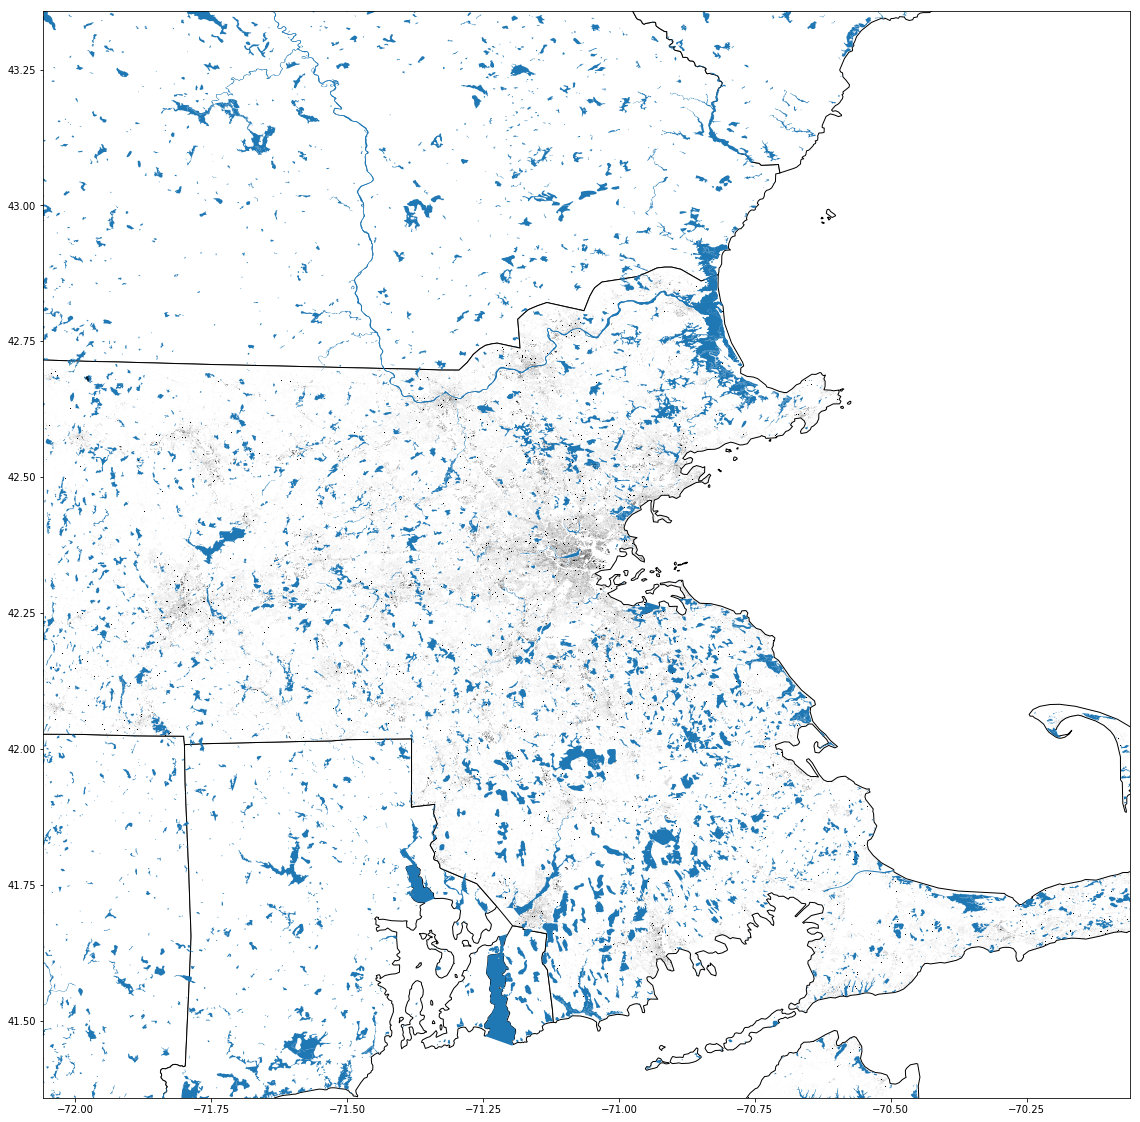

In [25]:
plot_city('Boston', 1)

water 238
buildings 71168


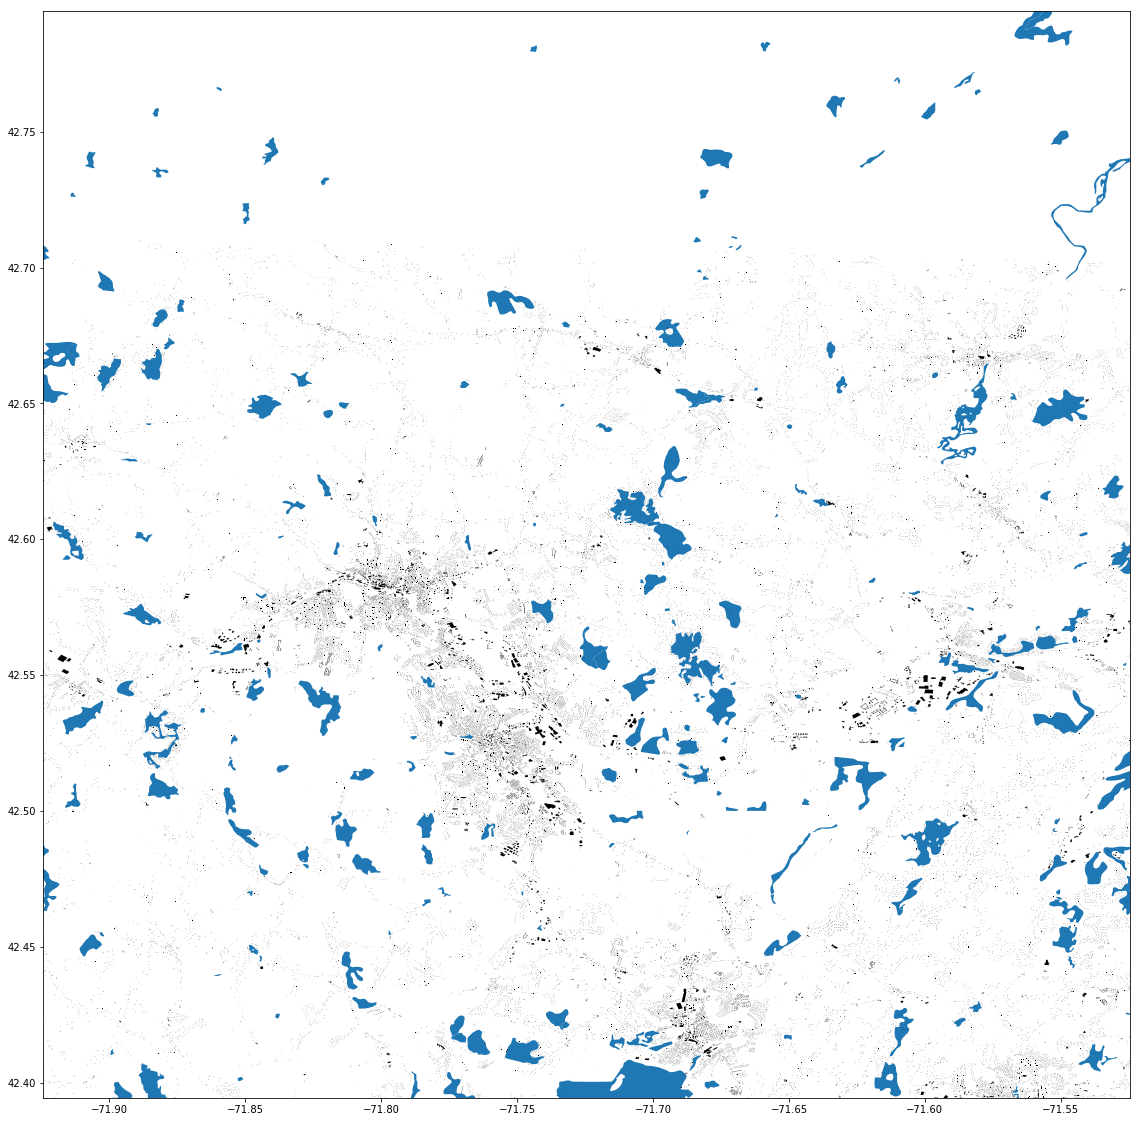

In [22]:
plot_city('Lunenburg')